# Bias Variance Tradeoff + More Overfitting

When modelling, we are trying to create a useful prediction that can help us in the future. When doing this, we have seen how we need to create a train test split in order to keep ourselves honest in tuning our model to the data itself. Another perspective on this problem of overfitting versus underfitting is the bias variance tradeoff. We can decompose the mean squared error of our models in terms of bias and variance to further investigate.

$ E[(y-\hat{f}(x)^2] = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$
  
  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

<img src="./images/bias_variance.png" alt="Drawing" style="width: 500px;"/>

## 1. Split the data into a test and train set.

In [2]:
import pandas as pd
df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
def norm(col):
    minimum = col.min()
    maximum = col.max()
    return (col-minimum)/(maximum-minimum)
for col in df:
    try:
        df[col] = norm(df[col])
    except:
        pass
X = df[['budget','imdbRating','Metascore','imdbVotes']]
y = df['domgross']
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0.034169,0.055325,21 &amp; Over,NaN,0.997516,0.839506,0.500000,0.384192,0.261351
1,0.182956,0.023779,Dredd 3D,NaN,0.999503,0.000000,0.000000,0.000000,0.070486
2,0.066059,0.125847,12 Years a Slave,NaN,1.000000,1.000000,1.000000,1.000000,0.704489
3,0.252847,0.183719,2 Guns,NaN,1.000000,0.827160,0.572917,0.323196,0.371052
4,0.157175,0.233625,42,NaN,1.000000,0.925926,0.645833,0.137984,0.231656


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## 2. Fit a regression model to the training data.

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## 2b. Plot the training predictions against the actual data. (Y_hat_train vs Y_train)

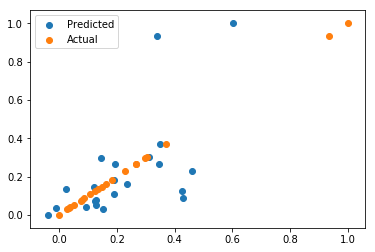

In [22]:
plt.scatter( reg.predict(X_train), y_train, label="Predicted")
plt.scatter(y_train, y_train, label = "Actual")
plt.legend()

## 2c. Plot the test predictions against the actual data. (Y_hat_test vs Y_train)

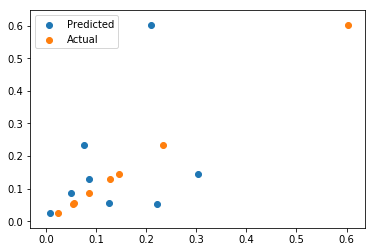

In [28]:
plt.scatter( reg.predict(X_test), y_test, label="Predicted")
plt.scatter(y_test, y_test, label = "Actual")
plt.legend()

## 3. Calculating Bias
Write a formula to calculate the bias of a models predictions given the actual data.   
(The expected value can simply be taken as the mean or average value.)  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  

In [40]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## 4. Calculating Variance
Write a formula to calculate the variance of a model's predictions (or any set of data).  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [36]:
y_pred = reg.predict(X_train)
np.mean(y_pred**2)

0.07599896124033617

In [44]:
def variance(y_hat):
    return np.mean(y_hat**2) - (np.mean(y_hat))**2

## 5. Us your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [45]:
#Train Set
b = bias(y_train, y_pred)
v = variance(y_pred)
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: 4.5418214643756407e-17 
Variance: 0.025794690456599496


In [46]:
y_pred_test = reg.predict(X_test) 
#Test Set
b = bias(y_test, y_pred_test)
v = variance(y_pred_test)
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -0.031175086387925006 
Variance: 0.008833717744524888


## 6. Describe in words what these numbers can tell you.

#Your description here (this cell is formatted using markdown)

Our training is not doing a good job of prediction. 

## 7. Overfit a new model by creating additional features by raising current features to various powers.

In [47]:
def more_features(X, power, amt):
    orig_columns = X.columns
    for feat in orig_columns:
        for i in power:
            X['{}^{}'.format(feat, i)] = X[feat].map(lambda x: x**i)
            if len(X.columns) >= amt:
                break
        if len(X.columns) >= amt:
            break
    return X

In [48]:
more_x_train = more_features(X_train, range(2,6), 25)
more_x_test = more_features(X_test, range(2,6), 25)

/Users/arihorwitz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [49]:
more_x_train.head()

,budget,imdbRating,Metascore,imdbVotes,budget^2,budget^3,budget^4,budget^5,imdbRating^2,imdbRating^3,imdbRating^4,imdbRating^5,Metascore^2,Metascore^3,Metascore^4,Metascore^5,imdbVotes^2,imdbVotes^3,imdbVotes^4,imdbVotes^5
21,0.430524,0.827160,0.541667,0.171879,0.185351,0.079798,0.034355,0.014791,0.684194,0.565939,0.468122,0.387212,0.293403,0.158927,0.086085,0.046629,0.029542,0.005078,0.000873,0.000150
27,0.612756,0.716049,0.427083,0.294330,0.375470,0.230072,0.140978,0.086385,0.512727,0.367138,0.262889,0.188241,0.182400,0.077900,0.033270,0.014209,0.086630,0.025498,0.007505,0.002209
15,0.111617,0.913580,0.885417,0.264784,0.012458,0.001391,0.000155,0.000017,0.834629,0.762500,0.696605,0.636405,0.783963,0.694134,0.614597,0.544175,0.070111,0.018564,0.004915,0.001302
14,0.225513,0.962963,0.864583,0.685073,0.050856,0.011469,0.002586,0.000583,0.927298,0.892953,0.859881,0.828034,0.747504,0.646280,0.558763,0.483097,0.469325,0.321522,0.220266,0.150899
20,0.476082,0.000000,0.000000,0.000000,0.226654,0.107906,0.051372,0.024457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 8a. Plot your overfitted model's training predictions against the actual data.

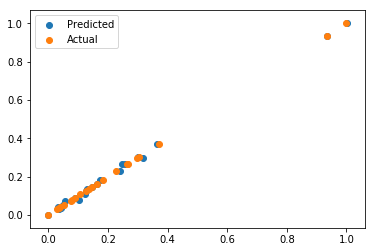

In [60]:
linreg = LinearRegression()
linreg.fit(more_x_train, y_train)
plt.scatter( linreg.predict(more_x_train), y_train, label="Predicted")
plt.scatter(y_train, y_train, label = "Actual")
plt.legend()

## 8b. Calculate the bias and variance for the train set.

In [58]:
more_pred = linreg.predict(more_x_train)
b = bias(y_train, more_pred)
v = variance(more_pred)
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -1.4065467540680388e-12 
Variance: 0.0651962193977827


## 9a. Plot your overfitted model's test predictions against the actual data.

In [64]:
len(more_x_train)

22

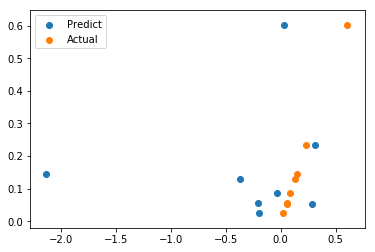

In [67]:
plt.scatter(linreg.predict(more_x_test), y_test, label="Predict")
plt.scatter(y_test, y_test, label = "Actual")
plt.legend()

## 9b. Calculate the bias and variance for the train set.

In [69]:
even_more = linreg.predict(more_x_test)
b = bias(y_test, even_more,)
v = variance(even_more)
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -0.45460489481381017 
Variance: 0.5338972708197555


## 10. Describe what you notice about the bias and variance statistics for your overfit model.

#Your description here (this cell is formatted using markdown)